# Forecast Verification Plot

###  This plot is made to show the trend in values of predicted flux values for 3 consecutive days after a particular day. 

### In this dataset, the way the values are labeled, is such that "observed" is technically the "adjusted" flux values for a specific date. And then subsequently, there are 3 values apart fromt eh "observed" which represent F10.7 flux predicted values for the next 3 days. 

### For example, on a date 19960101,
#### 1996, Jan 1st --> observed = 75, 
#### Predicted day 1 (1996, jan 2nd) = 78, predicted day 2 = 75 (1996, jan 3rd), predicted day 3 = 81 (1996, jan 4th)

Enter the starting date (YYYYMMDD): 19960102


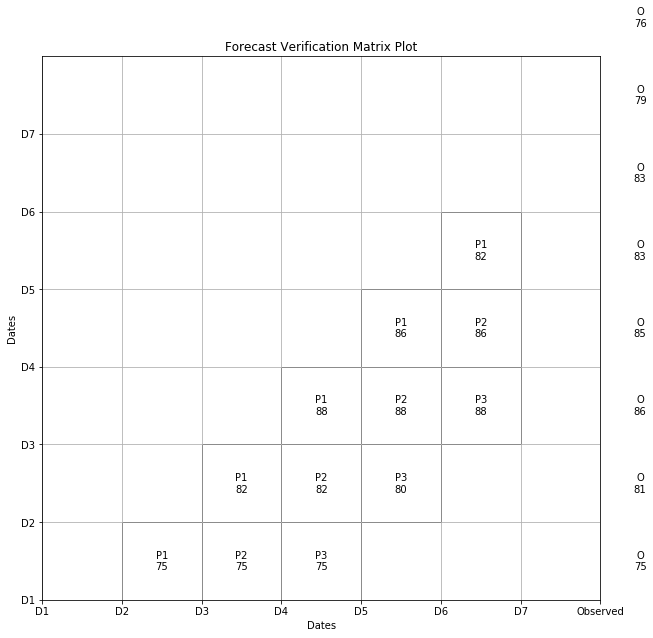

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from datetime import datetime, timedelta

# Function to clean the date column and log invalid dates
def clean_date_column(date_column, log_file='invalid_dates.log'):
    cleaned_dates = []
    with open(log_file, 'w') as log:
        for date in date_column:
            try:
                cleaned_date = datetime.strptime(str(date), '%Y%m%d')
                cleaned_dates.append(cleaned_date)
            except ValueError:
                log.write(f'Invalid date: {date}\n')
                cleaned_dates.append(pd.NaT)  # Append NaT (Not a Time) for invalid dates
    return cleaned_dates

# Function to create the forecast verification matrix plot
def plot_forecast_verification(start_date_str, file_path):
    # Load the data from the CSV file
    data = pd.read_csv(file_path)
    
    # Clean the 'Date' column
    data['Date'] = clean_date_column(data['Date'])
    
    # Drop rows with NaT values in the 'Date' column
    data = data.dropna(subset=['Date'])
    
    # Convert start date string to datetime
    start_date = datetime.strptime(start_date_str, '%Y%m%d')
    
    # Filter data for the date range
    end_date = start_date + timedelta(days=7)
    filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Set axis labels
    ax.set_xlabel('Dates')
    ax.set_ylabel('Dates')
    
    # Set axis limits and ticks
    ax.set_xlim(0, 7)
    ax.set_ylim(0, 7)
    ax.set_xticks(range(8))
    ax.set_yticks(range(7))
    ax.set_xticklabels([f'D{i+1}' for i in range(7)] + ['Observed'])
    ax.set_yticklabels([f'D{i+1}' for i in range(7)])
    
    # Add grid lines
    ax.grid(True)

    # Plot the observed and predicted values
    for i, row in filtered_data.iterrows():
        base_date = row['Date']
        observed_value = row['Observed']
        
        for j in range(3):
            if i + j + 1 < len(filtered_data):
                pred_value = row[f'Predicted Day {j+1}']
                pred_date = base_date + timedelta(days=j+1)
                delta_x = (pred_date - start_date).days
                delta_y = (base_date - start_date).days
                ax.add_patch(patches.Rectangle((delta_x, delta_y), 1, 1, edgecolor='black', facecolor='none'))
                ax.text(delta_x + 0.5, delta_y + 0.5, f'P{j+1}\n{pred_value}', ha='center', va='center')
        
        observed_delta_y = (base_date - start_date).days
        ax.add_patch(patches.Rectangle((7, observed_delta_y), 1, 1, edgecolor='black', facecolor='none'))
        ax.text(7.5, observed_delta_y + 0.5, f'O\n{observed_value}', ha='center', va='center')

    plt.title('Forecast Verification Matrix Plot')
    plt.show()

# Path to the CSV file
file_path = '/media/faraday/DATA/solar/F10.7/forecasts/NOAA/3DF/3DayForecast_1996to2023.csv'

# Prompt the user for a starting date
start_date_str = input("Enter the starting date (YYYYMMDD): ")

# Generate the plot
plot_forecast_verification(start_date_str, file_path)


On 1996, Jan 2nd, the observed value (plotted on the right side) is 75. The predicted value for day 1 (Jan 3rd) is 75, predicted value for day 2 (Jan 4th) is 75, predicted value for day 3 (Jan 5th) is 75.

Enter the starting date (YYYYMMDD): 20000305
Day 1 


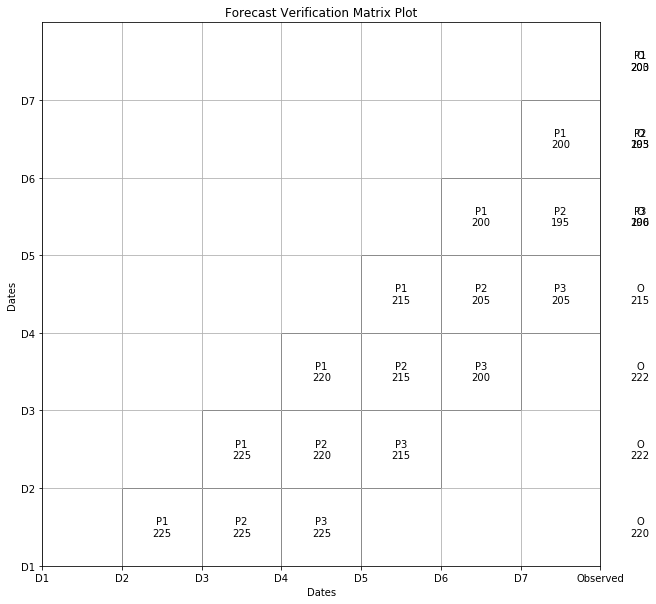

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from datetime import datetime, timedelta

# Function to clean the date column and log invalid dates
def clean_date_column(date_column, log_file='invalid_dates.log'):
    cleaned_dates = []
    with open(log_file, 'w') as log:
        for date in date_column:
            try:
                cleaned_date = datetime.strptime(str(date), '%Y%m%d')
                cleaned_dates.append(cleaned_date)
            except ValueError:
                log.write(f'Invalid date: {date}\n')
                cleaned_dates.append(pd.NaT)  # Append NaT (Not a Time) for invalid dates
    return cleaned_dates

# Function to create the forecast verification matrix plot
def plot_forecast_verification(start_date_str, file_path):
    # Load the data from the CSV file
    data = pd.read_csv(file_path)
    
    # Clean the 'Date' column
    data['Date'] = clean_date_column(data['Date'])
    
    # Drop rows with NaT values in the 'Date' column
    data = data.dropna(subset=['Date'])
    
    # Convert start date string to datetime
    start_date = datetime.strptime(start_date_str, '%Y%m%d')
    
    # Filter data for the date range
    end_date = start_date + timedelta(days=7)
    filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Set axis labels
    ax.set_xlabel('Dates')
    ax.set_ylabel('Dates')
    
    # Set axis limits and ticks
    ax.set_xlim(0, 7)
    ax.set_ylim(0, 7)
    ax.set_xticks(range(8))
    ax.set_yticks(range(7))
    ax.set_xticklabels([f'D{i+1}' for i in range(7)] + ['Observed'])
    ax.set_yticklabels([f'D{i+1}' for i in range(7)])
    
    # Add grid lines
    ax.grid(True)

    # Plot the observed and predicted values
    for i, row in filtered_data.iterrows():
        base_date = row['Date']
        observed_value = row['Observed']
        
        for j in range(3):
            if (i + j + 1) < len(data):
                pred_value = row[f'Predicted Day {j+1}']
                pred_date = base_date + timedelta(days=j+1)
                delta_x = (pred_date - start_date).days
                delta_y = (base_date - start_date).days
                if delta_x <= 7 and delta_y <= 6:  # Ensure the plot is within bounds
                    ax.add_patch(patches.Rectangle((delta_x, delta_y), 1, 1, edgecolor='black', facecolor='none'))
                    ax.text(delta_x + 0.5, delta_y + 0.5, f'P{j+1}\n{pred_value}', ha='center', va='center')
        
        observed_delta_y = (base_date - start_date).days
        if observed_delta_y <= 6:  # Ensure the plot is within bounds
            ax.add_patch(patches.Rectangle((7, observed_delta_y), 1, 1, edgecolor='black', facecolor='none'))
            ax.text(7.5, observed_delta_y + 0.5, f'O\n{observed_value}', ha='center', va='center')

    plt.title('Forecast Verification Matrix Plot')
    plt.show()

# Path to the CSV file
file_path = '/media/faraday/DATA/solar/F10.7/forecasts/NOAA/3DF/3DayForecast_1996to2023.csv'

# Prompt the user for a starting date
start_date_str = input("Enter the starting date (YYYYMMDD): ")
print ("Day 1 ")

# Generate the plot
plot_forecast_verification(start_date_str, file_path)


This is a different user provided date of 2003, March 5th. Notice the flux values are much higher compared to the previous plot. The flux values in the range of 200s, indicate this is perhaps in the domain of solar maximum. 

# Colormap for flux magnitude 

Enter the starting date (YYYYMMDD): 20110323


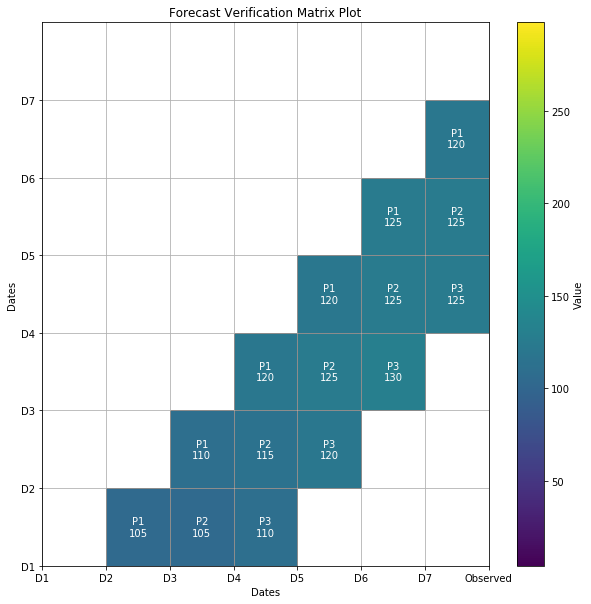

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from datetime import datetime, timedelta
import matplotlib.cm as cm
import numpy as np

# Function to clean the date column and log invalid dates
def clean_date_column(date_column, log_file='invalid_dates.log'):
    cleaned_dates = []
    with open(log_file, 'w') as log:
        for date in date_column:
            try:
                cleaned_date = datetime.strptime(str(date), '%Y%m%d')
                cleaned_dates.append(cleaned_date)
            except ValueError:
                log.write(f'Invalid date: {date}\n')
                cleaned_dates.append(pd.NaT)  # Append NaT (Not a Time) for invalid dates
    return cleaned_dates

# Function to create the forecast verification matrix plot
def plot_forecast_verification(start_date_str, file_path):
    # Load the data from the CSV file
    data = pd.read_csv(file_path)
    
    # Clean the 'Date' column
    data['Date'] = clean_date_column(data['Date'])
    
    # Drop rows with NaT values in the 'Date' column
    data = data.dropna(subset=['Date'])
    
    # Convert start date string to datetime
    start_date = datetime.strptime(start_date_str, '%Y%m%d')
    
    # Filter data for the date range
    end_date = start_date + timedelta(days=7)
    filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Set axis labels
    ax.set_xlabel('Dates')
    ax.set_ylabel('Dates')
    
    # Set axis limits and ticks
    ax.set_xlim(0, 7)
    ax.set_ylim(0, 7)
    ax.set_xticks(range(8))
    ax.set_yticks(range(7))
    ax.set_xticklabels([f'D{i+1}' for i in range(7)] + ['Observed'])
    ax.set_yticklabels([f'D{i+1}' for i in range(7)])
    
    # Add grid lines
    ax.grid(True)

    # Define the colormap
    cmap = cm.get_cmap('viridis')

    # Normalize the color scale based on the range of values
    norm = plt.Normalize(data[['Predicted Day 1', 'Predicted Day 2', 'Predicted Day 3', 'Observed']].min().min(),
                         data[['Predicted Day 1', 'Predicted Day 2', 'Predicted Day 3', 'Observed']].max().max())

    # Plot the observed and predicted values
    for i, row in filtered_data.iterrows():
        base_date = row['Date']
        observed_value = row['Observed']
        
        for j in range(3):
            if (i + j + 1) < len(data):
                pred_value = row[f'Predicted Day {j+1}']
                pred_date = base_date + timedelta(days=j+1)
                delta_x = (pred_date - start_date).days
                delta_y = (base_date - start_date).days
                if delta_x <= 7 and delta_y <= 6:  # Ensure the plot is within bounds
                    color = cmap(norm(pred_value))
                    ax.add_patch(patches.Rectangle((delta_x, delta_y), 1, 1, edgecolor='black', facecolor=color))
                    ax.text(delta_x + 0.5, delta_y + 0.5, f'P{j+1}\n{pred_value}', ha='center', va='center', color='white' if norm(pred_value) < 0.5 else 'black')
        
        observed_delta_y = (base_date - start_date).days
        if observed_delta_y <= 6:  # Ensure the plot is within bounds
            color = cmap(norm(observed_value))
            ax.add_patch(patches.Rectangle((7, observed_delta_y), 1, 1, edgecolor='black', facecolor=color))
            ax.text(7.5, observed_delta_y + 0.5, f'O\n{observed_value}', ha='center', va='center', color='white' if norm(observed_value) < 0.5 else 'black')

    plt.title('Forecast Verification Matrix Plot')
    plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical', label='Value')
    plt.show()

# Path to the CSV file
file_path = '/media/faraday/DATA/solar/F10.7/forecasts/NOAA/3DF/3DayForecast_1996to2023.csv'

# Prompt the user for a starting date
start_date_str = input("Enter the starting date (YYYYMMDD): ")

# Generate the plot
plot_forecast_verification(start_date_str, file_path)


A shade of light blue indicates medium flux values of 100s range, which is neither solar minium nor solar maximum. It lies somewhere in the middle. 

Enter the starting date (YYYYMMDD): 20000305


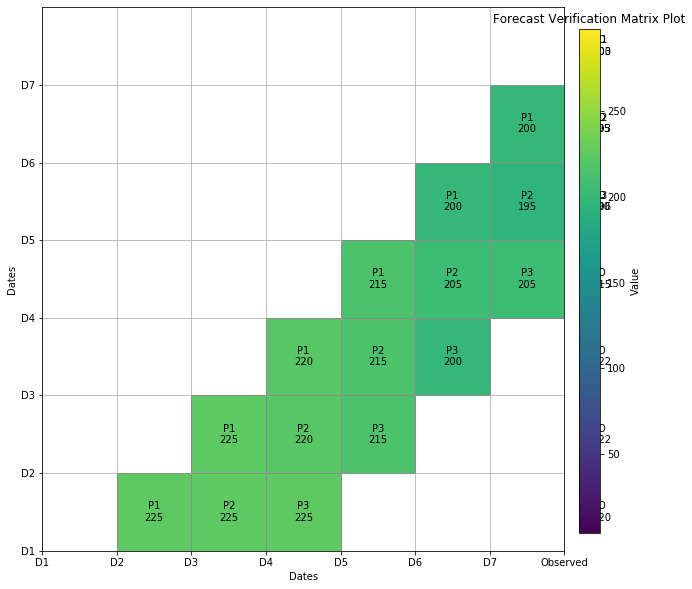

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from datetime import datetime, timedelta
import matplotlib.cm as cm
import numpy as np

# Function to clean the date column and log invalid dates
def clean_date_column(date_column, log_file='invalid_dates.log'):
    cleaned_dates = []
    with open(log_file, 'w') as log:
        for date in date_column:
            try:
                cleaned_date = datetime.strptime(str(date), '%Y%m%d')
                cleaned_dates.append(cleaned_date)
            except ValueError:
                log.write(f'Invalid date: {date}\n')
                cleaned_dates.append(pd.NaT)  # Append NaT (Not a Time) for invalid dates
    return cleaned_dates

# Function to create the forecast verification matrix plot
def plot_forecast_verification(start_date_str, file_path):
    # Load the data from the CSV file
    data = pd.read_csv(file_path)
    
    # Clean the 'Date' column
    data['Date'] = clean_date_column(data['Date'])
    
    # Drop rows with NaT values in the 'Date' column
    data = data.dropna(subset=['Date'])
    
    # Convert start date string to datetime
    start_date = datetime.strptime(start_date_str, '%Y%m%d')
    
    # Filter data for the date range
    end_date = start_date + timedelta(days=7)
    filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Set axis labels
    ax.set_xlabel('Dates')
    ax.set_ylabel('Dates')
    
    # Set axis limits and ticks
    ax.set_xlim(0, 7)
    ax.set_ylim(0, 7)
    ax.set_xticks(range(8))
    ax.set_yticks(range(7))
    ax.set_xticklabels([f'D{i+1}' for i in range(7)] + ['Observed'])
    ax.set_yticklabels([f'D{i+1}' for i in range(7)])
    
    # Add grid lines
    ax.grid(True)

    # Define the colormap
    cmap = cm.get_cmap('viridis')

    # Normalize the color scale based on the range of values
    norm = plt.Normalize(data[['Predicted Day 1', 'Predicted Day 2', 'Predicted Day 3', 'Observed']].min().min(),
                         data[['Predicted Day 1', 'Predicted Day 2', 'Predicted Day 3', 'Observed']].max().max())

    # Plot the observed and predicted values
    for i, row in filtered_data.iterrows():
        base_date = row['Date']
        observed_value = row['Observed']
        
        for j in range(3):
            if (i + j + 1) < len(data):
                pred_value = row[f'Predicted Day {j+1}']
                pred_date = base_date + timedelta(days=j+1)
                delta_x = (pred_date - start_date).days
                delta_y = (base_date - start_date).days
                if delta_x <= 7 and delta_y <= 6:  # Ensure the plot is within bounds
                    color = cmap(norm(pred_value))
                    ax.add_patch(patches.Rectangle((delta_x, delta_y), 1, 1, edgecolor='black', facecolor=color))
                    ax.text(delta_x + 0.5, delta_y + 0.5, f'P{j+1}\n{pred_value}', ha='center', va='center', color='white' if norm(pred_value) < 0.5 else 'black')
        
        observed_delta_y = (base_date - start_date).days
        if observed_delta_y <= 6:  # Ensure the plot is within bounds
            color = cmap(norm(observed_value))
            ax.add_patch(patches.Rectangle((7, observed_delta_y), 1, 1, edgecolor='black', facecolor=color))
            ax.text(7.5, observed_delta_y + 0.5, f'O\n{observed_value}', ha='center', va='center', color='white' if norm(observed_value) < 0.5 else 'black')

    # Adjust the layout to make space for the color bar
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.87, 0.15, 0.03, 0.7])  # Add a colorbar axis
    plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='vertical', label='Value')

    plt.title('Forecast Verification Matrix Plot')
    plt.show()

# Path to the CSV file
file_path = '/media/faraday/DATA/solar/F10.7/forecasts/NOAA/3DF/3DayForecast_1996to2023.csv'

# Prompt the user for a starting date
start_date_str = input("Enter the starting date (YYYYMMDD): ")

# Generate the plot
plot_forecast_verification(start_date_str, file_path)


This plot indicates a much active sun with flux values in the range of 200s. So, this is a time of solar maximum.


# Next Plan

To put observed values in the forecast verification plot alongside the predicted values. That way, the magnitude of flux values and colormap of observed value vs predicted could be well observed. 